In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition = fetch_ucirepo(id=544) 
  
# data (as pandas dataframes) 
X = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.features 
y = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.targets 
  
# metadata 
print(estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.metadata) 
  
# variable information 
print(estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.variables) 

{'uci_id': 544, 'name': 'Estimation of Obesity Levels Based On Eating Habits and Physical Condition ', 'repository_url': 'https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition', 'data_url': 'https://archive.ics.uci.edu/static/public/544/data.csv', 'abstract': 'This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. ', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 2111, 'num_features': 16, 'feature_types': ['Integer'], 'demographics': ['Gender', 'Age'], 'target_col': ['NObeyesdad'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Tue Sep 10 2024', 'dataset_doi': '10.24432/C5H31Z', 'creators': [], 'intro_paper': {'ID': 358, 'type': 

In [3]:
X.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation


In [4]:
y.head()

,NObeyesdad
0,Normal_Weight
1,Normal_Weight
2,Normal_Weight
3,Overweight_Level_I
4,Overweight_Level_II


In [5]:
df = pd.concat([X, y], axis=1)

## EDA

### Basic Data Exploration

In [6]:
print("1. DATASET OVERVIEW")
print("-" * 30)
print(f"Dataset shape: {df.shape}")
print(f"Total features: {df.shape[1]-1} (excluding target)")
print(f"Total samples: {df.shape[0]}")

1. DATASET OVERVIEW
------------------------------
Dataset shape: (2111, 17)
Total features: 16 (excluding target)
Total samples: 2111


In [7]:
print("\n2. FEATURE INFORMATION")
print("-" * 30)
print(df.info())

print("\n3. STATISTICAL SUMMARY")
print("-" * 30)
print(df.describe())

print("\n4. DATA TYPES")
print("-" * 30)
print(df.dtypes)

print("\n5. TARGET VARIABLE DISTRIBUTION")
print("-" * 30)
target_dist = df['NObeyesdad'].value_counts()
print(target_dist)
print(f"\nTarget balance ratio: {target_dist.min()/target_dist.max():.3f}")


2. FEATURE INFORMATION
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non

In [8]:
print("\n4. MISSING VALUES CHECK")
print("-" * 30)
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "No missing values found")


4. MISSING VALUES CHECK
------------------------------
No missing values found


### Target Variable Distribution

1. TARGET VARIABLE ANALYSIS
----------------------------------------


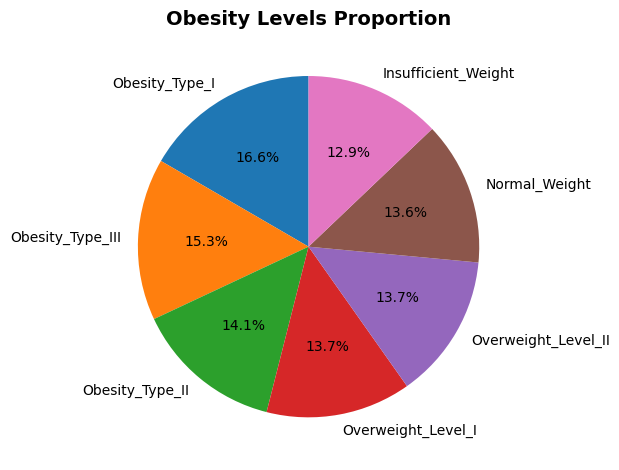

In [9]:
print("1. TARGET VARIABLE ANALYSIS")
print("-" * 40)

# fig, axes = plt.subplots(1,2 ,figsize=(15, 6))

# Pie chart
obesity_counts = df['NObeyesdad'].value_counts()
plt.pie(obesity_counts.values, labels=obesity_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Obesity Levels Proportion', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


2. DEMOGRAPHIC ANALYSIS
----------------------------------------


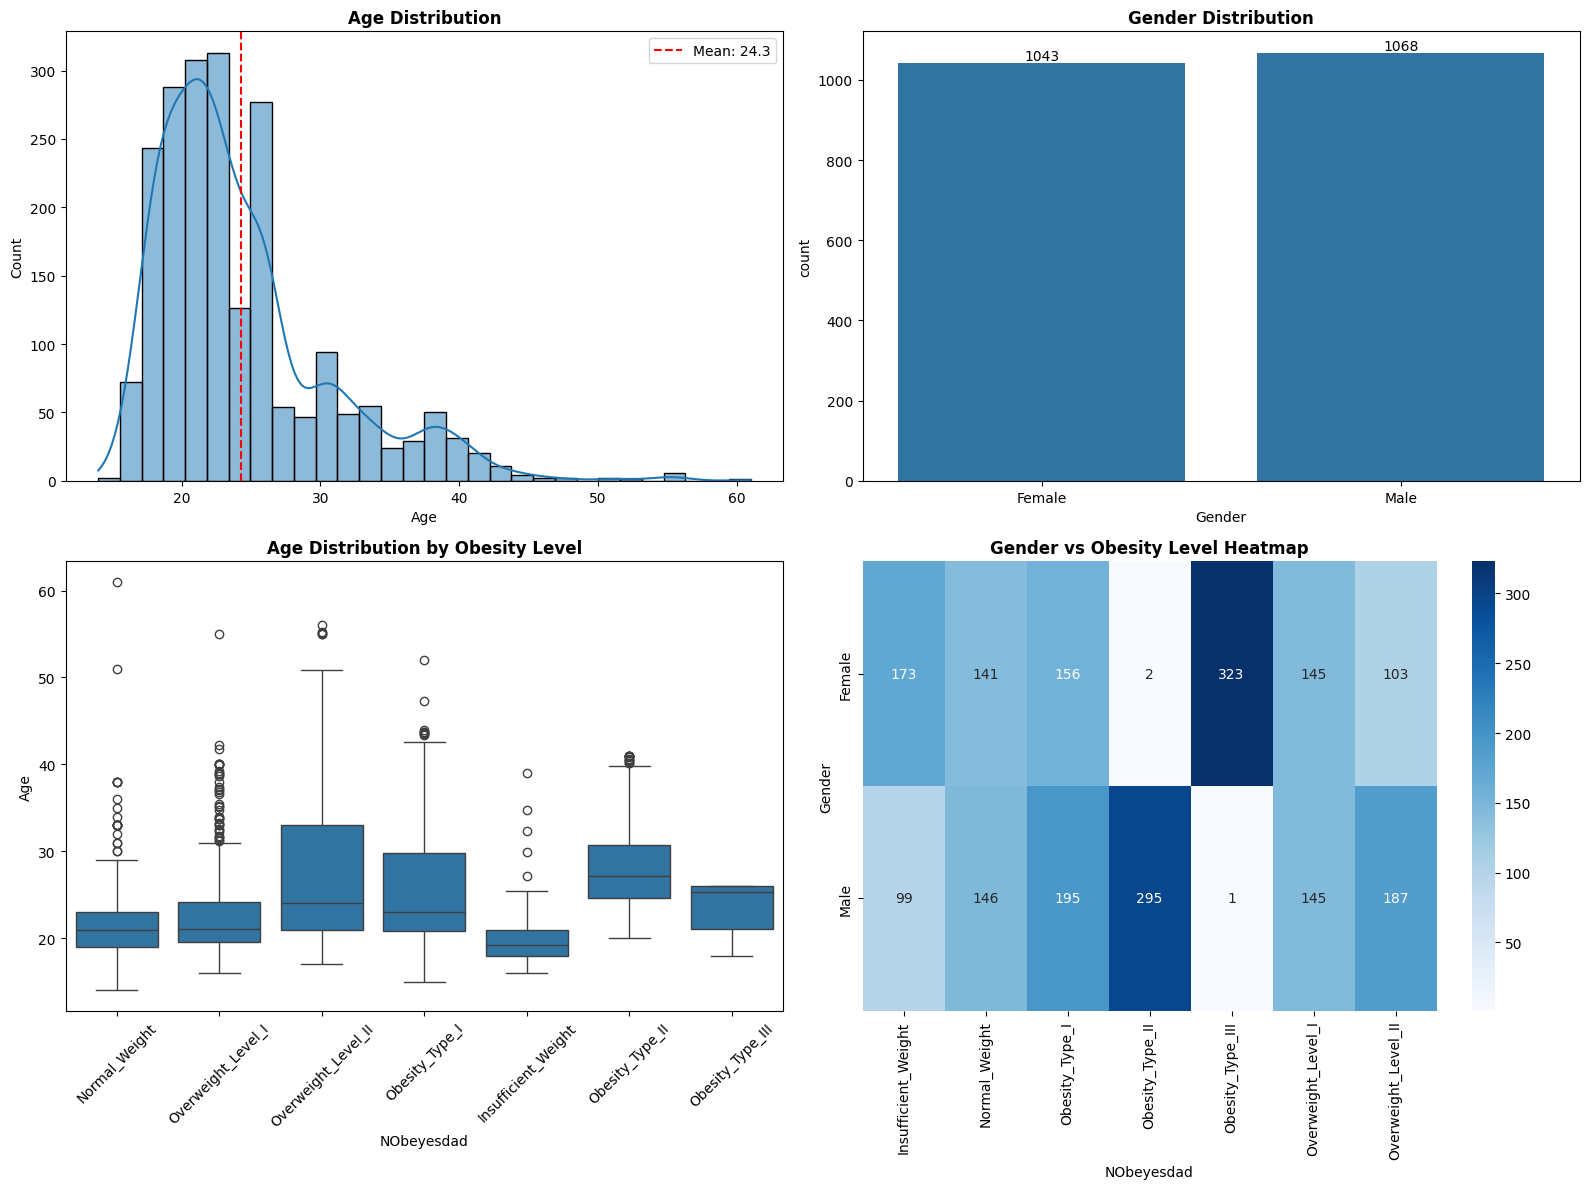

In [10]:
# 2. DEMOGRAPHIC ANALYSIS
print("\n2. DEMOGRAPHIC ANALYSIS")
print("-" * 40)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Age distribution
sns.histplot(data=df, x='Age', bins=30, kde=True, ax=axes[0,0])
axes[0,0].set_title('Age Distribution', fontsize=12, fontweight='bold')
axes[0,0].axvline(df['Age'].mean(), color='red', linestyle='--', label=f'Mean: {df["Age"].mean():.1f}')
axes[0,0].legend()

# Gender distribution
sns.countplot(data=df, x='Gender', ax=axes[0,1])
axes[0,1].set_title('Gender Distribution', fontsize=12, fontweight='bold')
for container in axes[0,1].containers:
    axes[0,1].bar_label(container)

# Age vs Obesity Level
sns.boxplot(data=df, x='NObeyesdad', y='Age', ax=axes[1,0])
axes[1,0].set_title('Age Distribution by Obesity Level', fontsize=12, fontweight='bold')
axes[1,0].tick_params(axis='x', rotation=45)

# Gender vs Obesity Level
ct_gender = pd.crosstab(df['Gender'], df['NObeyesdad'])
sns.heatmap(ct_gender, annot=True, fmt='d', cmap='Blues', ax=axes[1,1])
axes[1,1].set_title('Gender vs Obesity Level Heatmap', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show();


3. PHYSICAL CHARACTERISTICS ANALYSIS
----------------------------------------


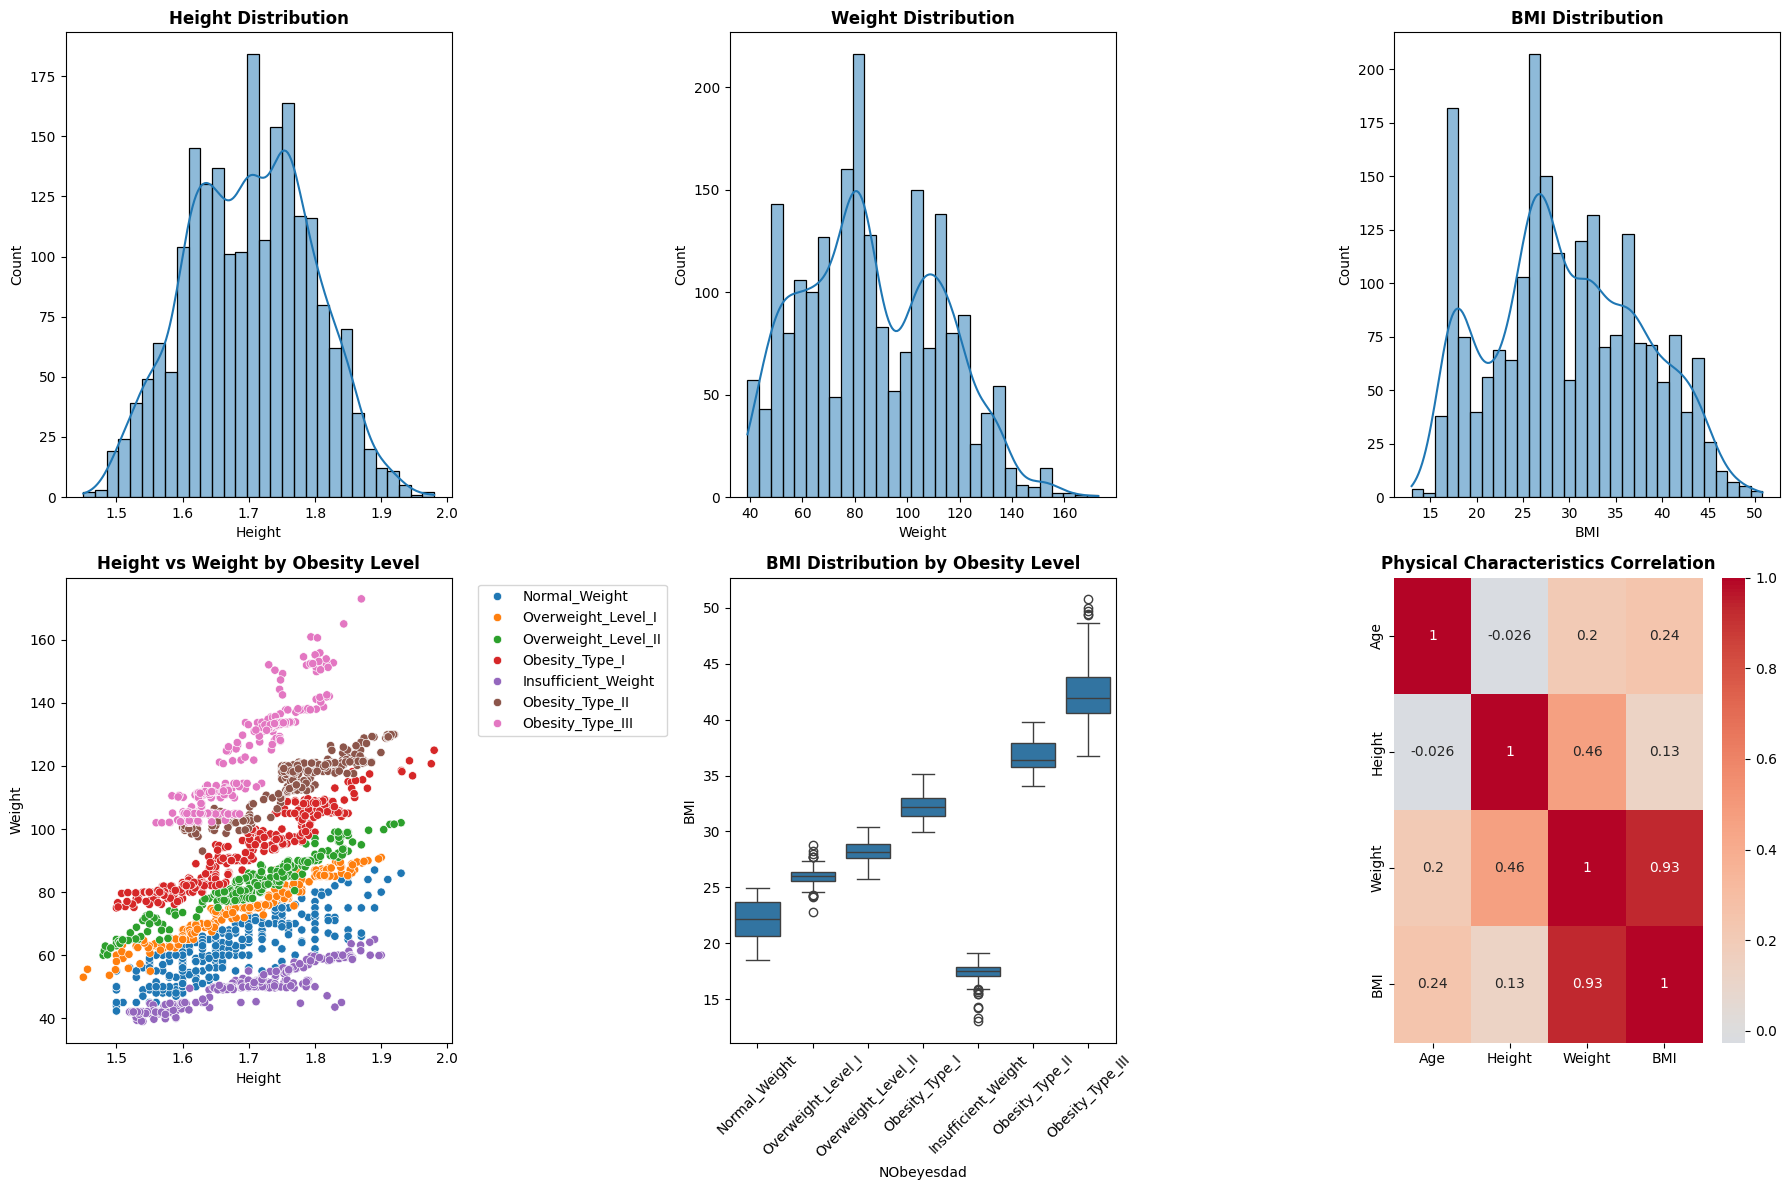

In [11]:
# 3. PHYSICAL CHARACTERISTICS ANALYSIS
print("\n3. PHYSICAL CHARACTERISTICS ANALYSIS")
print("-" * 40)

# Calculate BMI
df['BMI'] = df['Weight'] / (df['Height'] ** 2)

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Height distribution
sns.histplot(data=df, x='Height', bins=30, kde=True, ax=axes[0,0])
axes[0,0].set_title('Height Distribution', fontsize=12, fontweight='bold')

# Weight distribution
sns.histplot(data=df, x='Weight', bins=30, kde=True, ax=axes[0,1])
axes[0,1].set_title('Weight Distribution', fontsize=12, fontweight='bold')

# BMI distribution
sns.histplot(data=df, x='BMI', bins=30, kde=True, ax=axes[0,2])
axes[0,2].set_title('BMI Distribution', fontsize=12, fontweight='bold')

# Height vs Weight scatter
sns.scatterplot(data=df, x='Height', y='Weight', hue='NObeyesdad', ax=axes[1,0])
axes[1,0].set_title('Height vs Weight by Obesity Level', fontsize=12, fontweight='bold')
axes[1,0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# BMI by Obesity Level
sns.boxplot(data=df, x='NObeyesdad', y='BMI', ax=axes[1,1])
axes[1,1].set_title('BMI Distribution by Obesity Level', fontsize=12, fontweight='bold')
axes[1,1].tick_params(axis='x', rotation=45)

# Correlation matrix for physical characteristics
phys_cols = ['Age', 'Height', 'Weight', 'BMI']
corr_matrix = df[phys_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, ax=axes[1,2])
axes[1,2].set_title('Physical Characteristics Correlation', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show();



5. LIFESTYLE AND ACTIVITY ANALYSIS
----------------------------------------


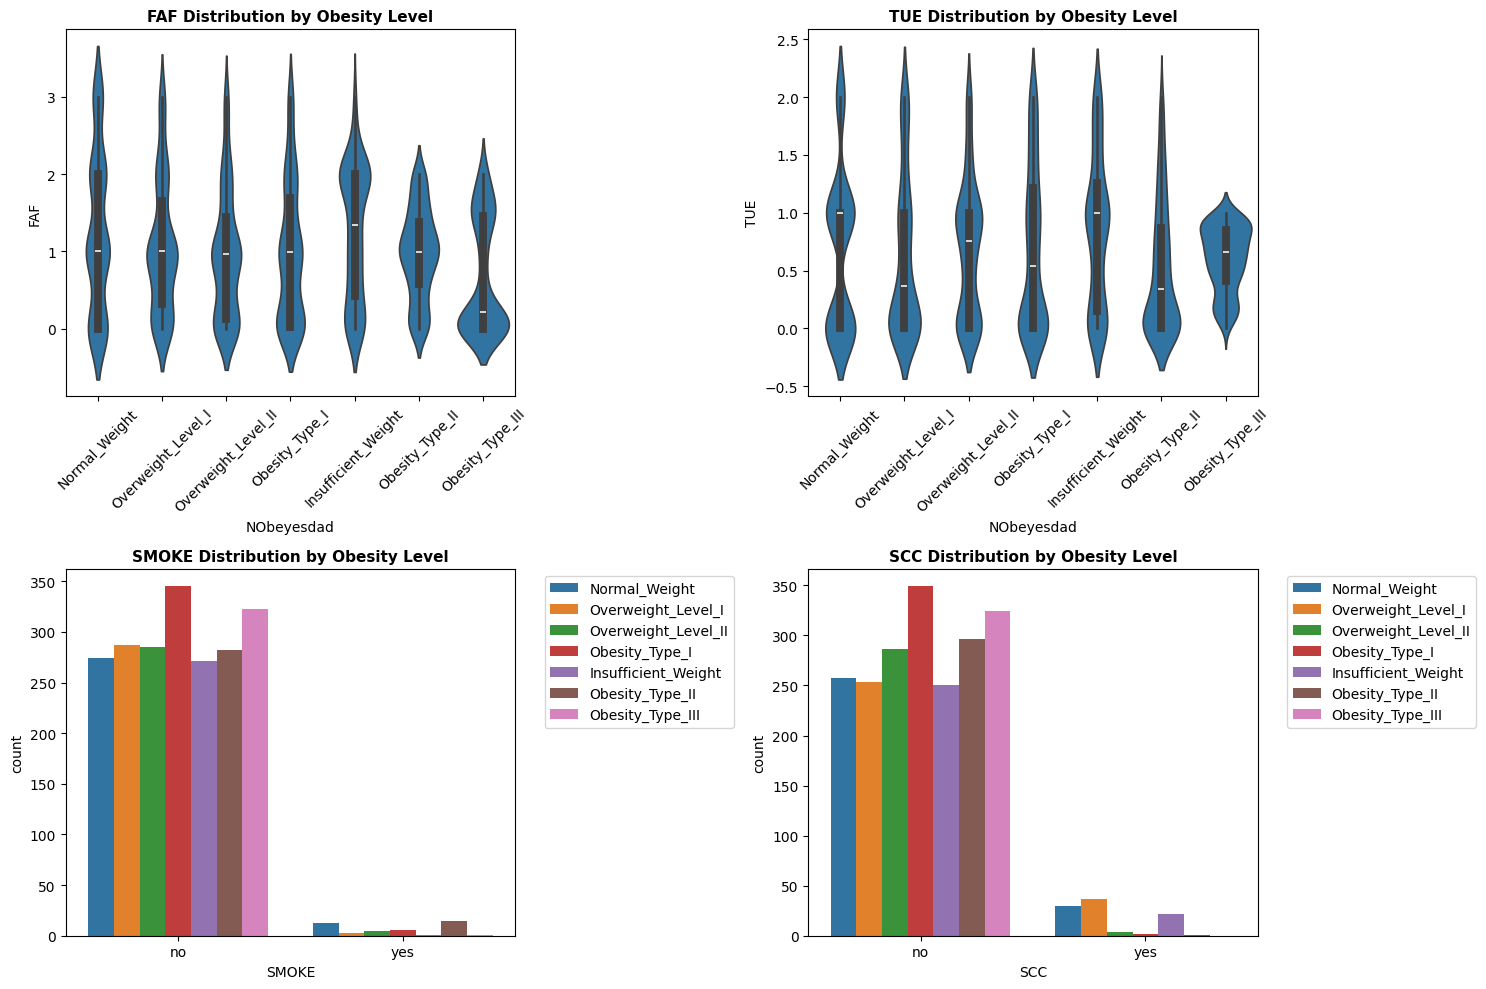

In [12]:
# 5. LIFESTYLE AND ACTIVITY ANALYSIS
print("\n5. LIFESTYLE AND ACTIVITY ANALYSIS")
print("-" * 40)

lifestyle_cols = ['FAF', 'TUE', 'SMOKE', 'SCC', 'MTRANS']
available_lifestyle_cols = [col for col in lifestyle_cols if col in df.columns]

if len(available_lifestyle_cols) >= 2:
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.flatten()
    
    plot_idx = 0
    for col in available_lifestyle_cols[:4]:
        if col in df.columns:
            if df[col].dtype == 'object':
                # Categorical variable
                sns.countplot(data=df, x=col, hue='NObeyesdad', ax=axes[plot_idx])
                axes[plot_idx].set_title(f'{col} Distribution by Obesity Level', fontsize=11, fontweight='bold')
                axes[plot_idx].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
            else:
                # Numerical variable
                sns.violinplot(data=df, x='NObeyesdad', y=col, ax=axes[plot_idx])
                axes[plot_idx].set_title(f'{col} Distribution by Obesity Level', fontsize=11, fontweight='bold')
                axes[plot_idx].tick_params(axis='x', rotation=45)
            plot_idx += 1
    
    # Hide unused subplots
    for i in range(plot_idx, 4):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show();


6. CORRELATION ANALYSIS
----------------------------------------


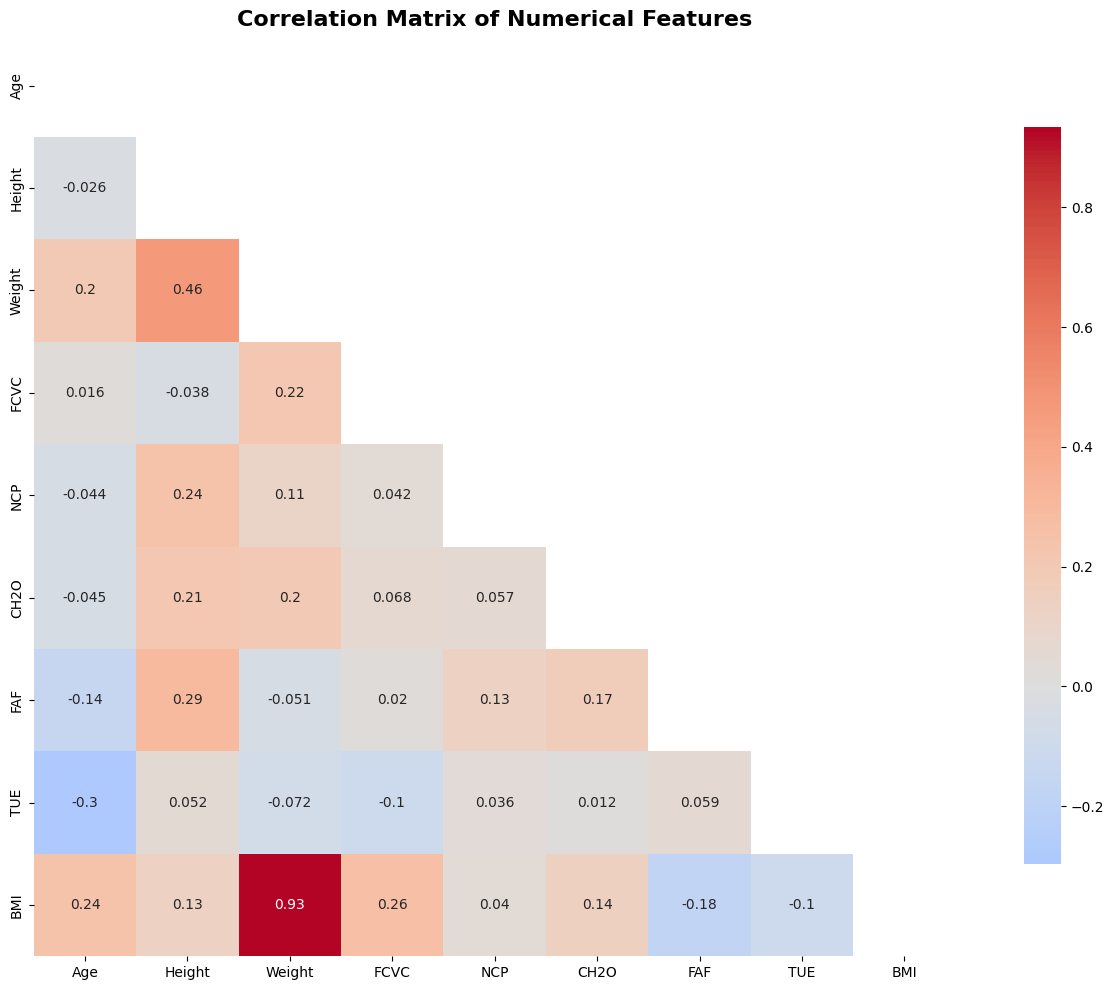

In [13]:
# 6. CORRELATION ANALYSIS
print("\n6. CORRELATION ANALYSIS")
print("-" * 40)

# Select numerical columns for correlation
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

if len(numerical_cols) > 2:
    # Overall correlation matrix
    plt.figure(figsize=(14, 10))
    correlation_matrix = df[numerical_cols].corr()
    
    # Create mask for upper triangle
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    
    sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', 
                center=0, square=True, cbar_kws={"shrink": .8})
    plt.title('Correlation Matrix of Numerical Features', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show();

In [14]:
##Pending - Insights based o data that would be in report

## FEATURE ENGINEERING

In [15]:
# Check for missing values
df_processed = df.copy()
# We do not have any missing values. No treatment is required

# Check for duplicates
initial_rows = len(df_processed)
df_processed = df_processed.drop_duplicates()
removed_duplicates = initial_rows - len(df_processed)
print("Duplicates Removed")
print(removed_duplicates)

Duplicates Removed
24


In [16]:
# Creating BMI Category Variable
height_col = df_processed['Height']
if height_col.mean() > 10:  # Height in cm, convert to meters
    height_col = height_col / 100

df_processed['BMI'] = df_processed['Weight'] / (height_col ** 2)

# BMI categories
df_processed['BMI_Category'] = pd.cut(df_processed['BMI'], 
                                    bins=[0, 18.5, 25, 30, 35, 40, 100],
                                    labels=['Underweight', 'Normal', 'Overweight', 
                                           'Obese_I', 'Obese_II', 'Obese_III'])
print("BMI and BMI categories created")

BMI and BMI categories created


In [17]:
df_processed.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI,BMI_Category
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,24.386526,Normal
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,24.238227,Normal
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,23.765432,Normal
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,26.851852,Overweight
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,28.342381,Overweight


In [18]:
df_processed['Age_Group'] = pd.cut(df_processed['Age'], 
                                  bins=[0, 18, 25, 35, 45, 55, 100],
                                  labels=['Teen', 'Young_Adult', 'Adult', 
                                         'Middle_Aged', 'Senior', 'Elderly'])
print("Age groups created")
df_processed.head()

Age groups created


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI,BMI_Category,Age_Group
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,24.386526,Normal,Young_Adult
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,24.238227,Normal,Young_Adult
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,23.765432,Normal,Young_Adult
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,26.851852,Overweight,Adult
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,28.342381,Overweight,Young_Adult


In [19]:
# Physical activity score
# Normalize FAF (higher is better) and TUE (lower is better)
faf_norm = (df_processed['FAF'] - df_processed['FAF'].min()) / (df_processed['FAF'].max() - df_processed['FAF'].min())
tue_norm = (df_processed['TUE'] - df_processed['TUE'].min()) / (df_processed['TUE'].max() - df_processed['TUE'].min())
df_processed['Physical_Activity_Score'] = faf_norm - tue_norm
print("Physical activity score created")

df_processed.head()

Physical activity score created


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI,BMI_Category,Age_Group,Physical_Activity_Score
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,...,no,0.0,1.0,no,Public_Transportation,Normal_Weight,24.386526,Normal,Young_Adult,-0.500000
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,...,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,24.238227,Normal,Young_Adult,1.000000
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,...,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,23.765432,Normal,Young_Adult,0.166667
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,...,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,26.851852,Overweight,Adult,0.666667
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,...,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,28.342381,Overweight,Young_Adult,0.000000


In [20]:
# Healthy eating composite score
eating_cols = ['FCVC', 'CH2O']
fcvc_norm = df_processed['FCVC'] / df_processed['FCVC'].max()
ch2o_norm = df_processed['CH2O'] / df_processed['CH2O'].max()
df_processed['Healthy_Eating_Score'] = (fcvc_norm + ch2o_norm) / 2
print("Healthy eating score created")

df_processed.head()

Healthy eating score created


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI,BMI_Category,Age_Group,Physical_Activity_Score,Healthy_Eating_Score
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,...,0.0,1.0,no,Public_Transportation,Normal_Weight,24.386526,Normal,Young_Adult,-0.500000,0.666667
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,...,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,24.238227,Normal,Young_Adult,1.000000,1.000000
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,...,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,23.765432,Normal,Young_Adult,0.166667,0.666667
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,...,2.0,0.0,Frequently,Walking,Overweight_Level_I,26.851852,Overweight,Adult,0.666667,0.833333
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,...,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,28.342381,Overweight,Young_Adult,0.000000,0.666667


In [21]:
# Risk factors count
risk_cols = ['family_history_with_overweight', 'FAVC', 'SMOKE']
risk_score = 0
for col in risk_cols:
    if df_processed[col].dtype == 'object':
        risk_score += (df_processed[col] == 'yes').astype(int)
    else:
        risk_score += df_processed[col].astype(int)
df_processed['Risk_Factor_Count'] = risk_score
print("Risk factors count created")

df_processed.head()

Risk factors count created


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,TUE,CALC,MTRANS,NObeyesdad,BMI,BMI_Category,Age_Group,Physical_Activity_Score,Healthy_Eating_Score,Risk_Factor_Count
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,...,1.0,no,Public_Transportation,Normal_Weight,24.386526,Normal,Young_Adult,-0.500000,0.666667,1
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,...,0.0,Sometimes,Public_Transportation,Normal_Weight,24.238227,Normal,Young_Adult,1.000000,1.000000,2
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,...,1.0,Frequently,Public_Transportation,Normal_Weight,23.765432,Normal,Young_Adult,0.166667,0.666667,1
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,...,0.0,Frequently,Walking,Overweight_Level_I,26.851852,Overweight,Adult,0.666667,0.833333,0
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,...,0.0,Sometimes,Public_Transportation,Overweight_Level_II,28.342381,Overweight,Young_Adult,0.000000,0.666667,0


In [22]:
# Meal frequency category
df_processed['Meal_Frequency'] = pd.cut(df_processed['NCP'], 
                                   bins=[0, 2, 3, 4, 10],
                                   labels=['Low', 'Normal', 'High', 'Very_High'])
print("Meal frequency categories created")
print(df_processed.head())

Meal frequency categories created
   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  ...        CALC                 MTRANS  \
0  3.0  Sometimes    no  ...          no  Public_Transportation   
1  3.0  Sometimes   yes  ...   Sometimes  Public_Transportation   
2  3.0  Sometimes    no  ...  Frequently  Public_Transportation   
3  3.0  Sometimes    no  ...  Frequently                Walking   
4  1.0  Sometimes    no  ...   Sometimes  Public_Transportation   

            NObeyesdad        BMI BMI_Category    Age_Group  \
0        Normal_Weight  24.386526    

In [23]:
#Target variable
target_col = 'NObeyesdad'
feature_cols = [col for col in df_processed.columns if col != target_col]

In [24]:
# Encode target variable (ordinal)
obesity_order = ['Insufficient Weight', 'Normal Weight', 'Overweight Level I', 
                'Overweight Level II', 'Obesity Type I', 'Obesity Type II', 'Obesity Type III']

if target_col in df_processed.columns:
    df_processed[target_col + '_encoded'] = df_processed[target_col].map(
        {level: i for i, level in enumerate(obesity_order)}
    )
    print("Target variable encoded")

Target variable encoded


In [25]:
# Handle categorical features
categorical_cols = df_processed.select_dtypes(include=['object']).columns
categorical_cols = [col for col in categorical_cols if col != target_col]

In [26]:
# Binary mappings
binary_mappings = {
    'Gender': {'Male': 1, 'Female': 0},
    'family_history_with_overweight': {'yes': 1, 'no': 0},
    'FAVC': {'yes': 1, 'no': 0},
    'SMOKE': {'yes': 1, 'no': 0},
    'SCC': {'yes': 1, 'no': 0}
}

In [27]:
encoded_features = []

for col in categorical_cols:
    unique_vals = df_processed[col].unique()
    
    # Check if it's a binary variable
    if len(unique_vals) == 2:
        if col in binary_mappings:
            mapping = binary_mappings[col]
        else:
            # Generic binary mapping
            mapping = {unique_vals[0]: 0, unique_vals[1]: 1}
        
        df_processed[col + '_encoded'] = df_processed[col].map(mapping)
        encoded_features.append(col + '_encoded')
        print(f"Binary encoded: {col}")
        
    else:
        # One-hot encoding for multi-class categorical
        dummies = pd.get_dummies(df_processed[col], prefix=col, drop_first=True)
        df_processed = pd.concat([df_processed, dummies], axis=1)
        encoded_features.extend(dummies.columns.tolist())
        print(f"One-hot encoded: {col} ({len(dummies.columns)} features)")

Binary encoded: Gender
Binary encoded: family_history_with_overweight
Binary encoded: FAVC
One-hot encoded: CAEC (3 features)
Binary encoded: SMOKE
Binary encoded: SCC
One-hot encoded: CALC (3 features)
One-hot encoded: MTRANS (4 features)


In [28]:
df_processed.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,CAEC_no,SMOKE_encoded,SCC_encoded,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,...,False,0,0,False,False,True,False,False,True,False
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,...,False,1,1,False,True,False,False,False,True,False
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,...,False,0,0,True,False,False,False,False,True,False
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,...,False,0,0,True,False,False,False,False,False,True
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,...,False,0,0,False,True,False,False,False,True,False


In [29]:
list(df_processed.columns)

['Gender',
 'Age',
 'Height',
 'Weight',
 'family_history_with_overweight',
 'FAVC',
 'FCVC',
 'NCP',
 'CAEC',
 'SMOKE',
 'CH2O',
 'SCC',
 'FAF',
 'TUE',
 'CALC',
 'MTRANS',
 'NObeyesdad',
 'BMI',
 'BMI_Category',
 'Age_Group',
 'Physical_Activity_Score',
 'Healthy_Eating_Score',
 'Risk_Factor_Count',
 'Meal_Frequency',
 'NObeyesdad_encoded',
 'Gender_encoded',
 'family_history_with_overweight_encoded',
 'FAVC_encoded',
 'CAEC_Frequently',
 'CAEC_Sometimes',
 'CAEC_no',
 'SMOKE_encoded',
 'SCC_encoded',
 'CALC_Frequently',
 'CALC_Sometimes',
 'CALC_no',
 'MTRANS_Bike',
 'MTRANS_Motorbike',
 'MTRANS_Public_Transportation',
 'MTRANS_Walking']

## MODELLING

### Random Forest

In [30]:
from helper_functions import (
    preprocessor, labelEncode, split, random_forest_classifier,
    eval_metrics, hyperparameter_tuning_rf, grid_rfc, plot_feature_importance, plot_shap_summary
)

X = df_processed.drop(["NObeyesdad"], axis=1)
y = df_processed['NObeyesdad']

# Preprocess and split data
try:
    np.random.seed(42)
    (X_train, X_test, y_train, y_test), preprocessor_obj, label_encoder = split(
        X, y, numerical_cols, categorical_cols
    )
    print("Data split successfully")
    print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")
except Exception as e:
    print(f"Error during data splitting: {str(e)}")
    raise

Data split successfully
Train shape: (1669, 32), Test shape: (418, 32)


In [31]:
model_rf = random_forest_classifier(X_train, y_train)
print("Model successfully trained")

Model successfully trained


In [32]:
categorical_cols

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS']

In [33]:
numerical_cols

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'BMI']

## EVALUATION

In [34]:
# Make predictions
y_pred = model_rf.predict(X_test)
y_proba = model_rf.predict_proba(X_test) if hasattr(model_rf, "predict_proba") else None

# Get class names from label encoder
class_names = label_encoder.classes_

# Calculate and display metrics
metrics = eval_metrics(y_test, y_pred, y_proba, class_names)
print("\nClassification Report:")
print(pd.DataFrame(metrics['classification_report']).transpose())
print(f"\nAccuracy: {metrics['accuracy']:.4f}")
print(f"Weighted Precision: {metrics['precision']:.4f}")
print(f"Weighted Recall: {metrics['recall']:.4f}")
print(f"Weighted F1 Score: {metrics['f1']:.4f}")


Classification Report:
              precision    recall  f1-score     support
0              1.000000  1.000000  1.000000   53.000000
1              0.919355  1.000000  0.957983   57.000000
2              1.000000  1.000000  1.000000   70.000000
3              0.983607  1.000000  0.991736   60.000000
4              1.000000  0.984615  0.992248   65.000000
5              1.000000  0.927273  0.962264   55.000000
6              0.982456  0.965517  0.973913   58.000000
accuracy       0.983254  0.983254  0.983254    0.983254
macro avg      0.983631  0.982486  0.982592  418.000000
weighted avg   0.984215  0.983254  0.983294  418.000000

Accuracy: 0.9833
Weighted Precision: 0.9842
Weighted Recall: 0.9833
Weighted F1 Score: 0.9833


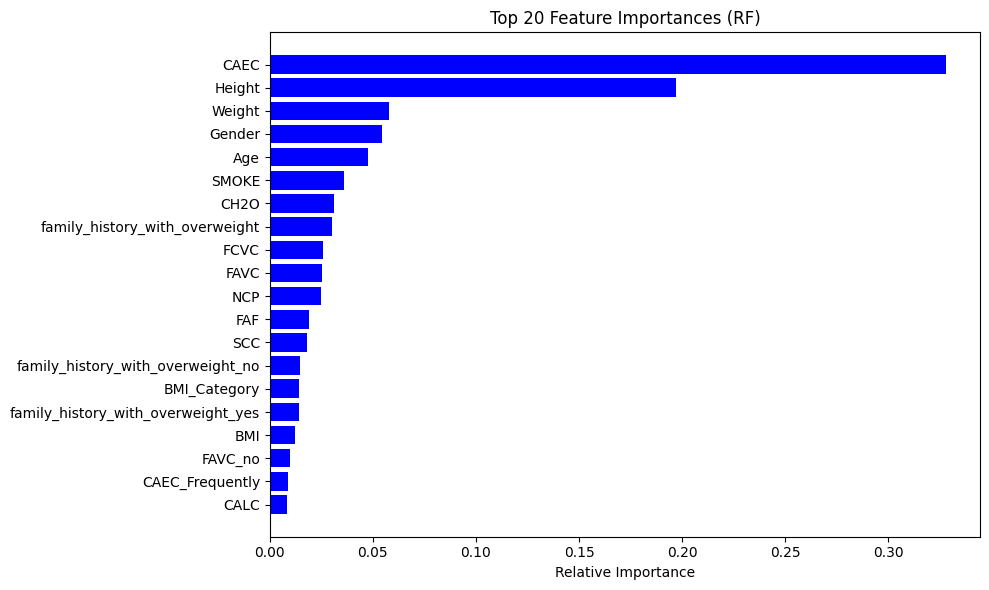

In [35]:
# Plot feature importance (get feature names after one-hot encoding)
try:
    # Get feature names after preprocessing
    num_features = feature_cols
    cat_features = preprocessor_obj.named_transformers_['cat'].get_feature_names_out(categorical_cols)
    all_feature_names = np.concatenate([num_features, cat_features])
    
    plot_feature_importance(model_rf, all_feature_names)
except Exception as e:
    print(f"Could not plot feature importance: {str(e)}")

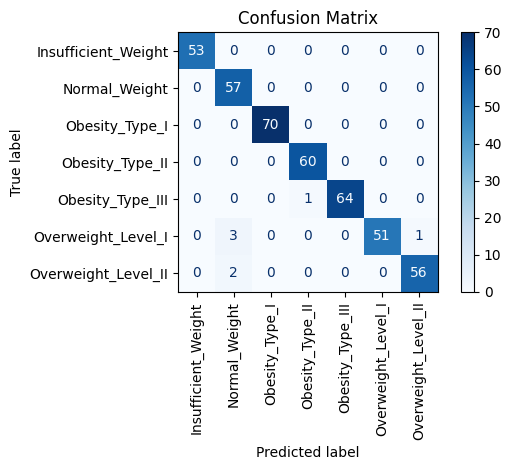

In [36]:
# Plot Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show();

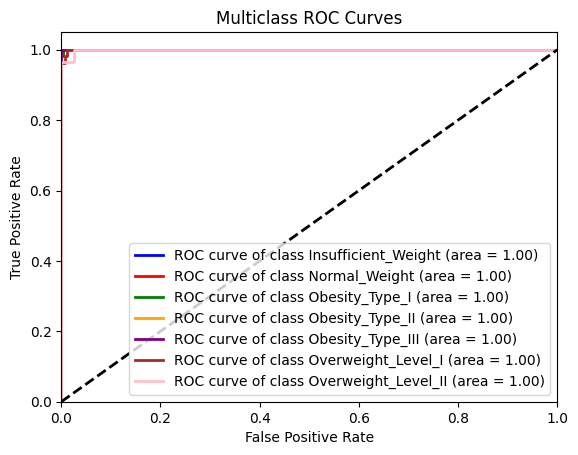

In [37]:
# Plot ROC Curve (for binary classification)
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

if len(class_names) == 2 and y_proba is not None:
    fpr, tpr, _ = roc_curve(y_test, y_proba[:, 1])
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
elif y_proba is not None:
    # For multiclass classification - plot ROC for each class
    y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
    n_classes = y_test_bin.shape[1]
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    # Plot all ROC curves
    plt.figure()
    colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink']  # Add more if needed
    
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'ROC curve of class {class_names[i]} (area = {roc_auc[i]:.2f})')
    
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Multiclass ROC Curves')
    plt.legend(loc="lower right")
    plt.show();

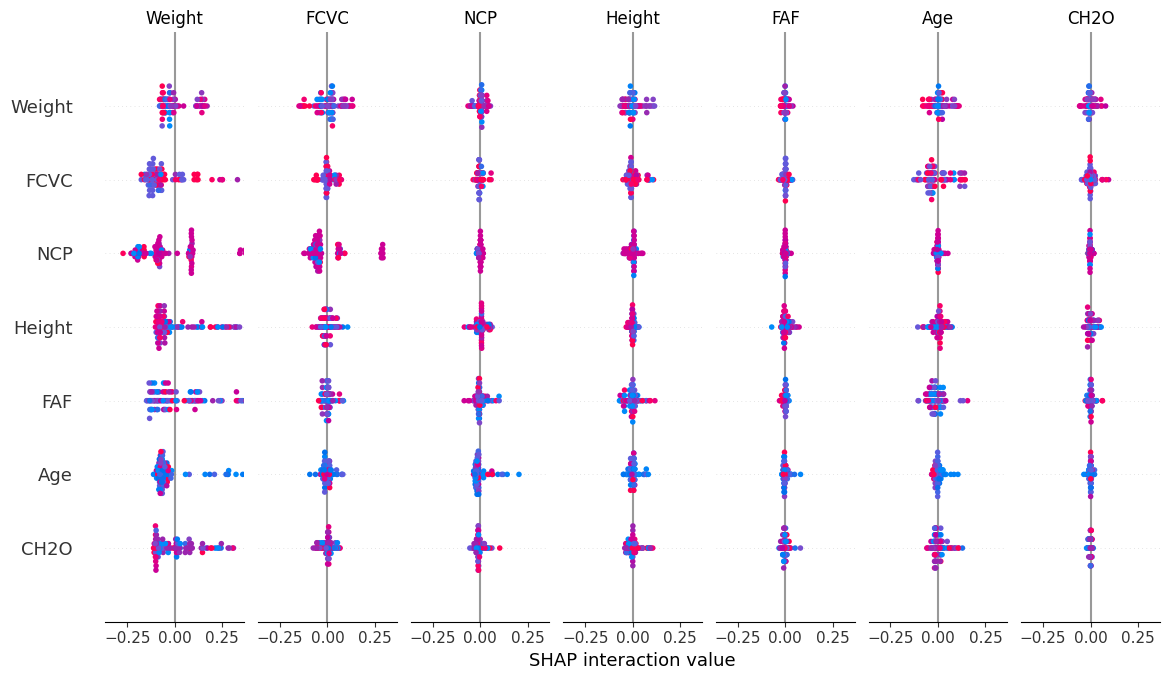

In [38]:
try:
    # Get feature names after preprocessing (you already have this from feature importance)
    num_features = numerical_cols  # Make sure this matches your numerical columns
    cat_features = preprocessor_obj.named_transformers_['cat'].get_feature_names_out(categorical_cols)
    all_feature_names = np.concatenate([num_features, cat_features])
    
    # SHAP needs either the training data or a sample of the test data
    # Using a sample for faster computation (SHAP can be slow for large datasets)
    sample_idx = np.random.choice(X_test.shape[0], 100, replace=False)
    X_sample = X_test[sample_idx]
    
    # Plot SHAP summary
    plot_shap_summary(model_rf, X_sample, all_feature_names)
    
except Exception as e:
    print(f"Could not plot SHAP summary: {str(e)}")

In [39]:
grid_rf = hyperparameter_tuning_rf(X_train, y_train, param_grid=None)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


In [40]:
grid_rf.best_params_

{'bootstrap': False,
 'max_depth': 20,
 'min_samples_split': 5,
 'n_estimators': 200}

In [41]:
from helper_functions import grid_rfc
best_params = {'bootstrap': False,
 'max_depth': 20,
 'min_samples_split': 5,
 'n_estimators': 200}

grid_cv_model = grid_rfc(X_train, y_train, **best_params)

In [42]:
# Make predictions
y_pred = grid_cv_model.predict(X_test)
y_proba = grid_cv_model.predict_proba(X_test) if hasattr(model_rf, "predict_proba") else None

# Get class names from label encoder
class_names = label_encoder.classes_

# Calculate and display metrics
metrics = eval_metrics(y_test, y_pred, y_proba, class_names)
print("\nClassification Report:")
print(pd.DataFrame(metrics['classification_report']).transpose())
print(f"\nAccuracy: {metrics['accuracy']:.4f}")
print(f"Weighted Precision: {metrics['precision']:.4f}")
print(f"Weighted Recall: {metrics['recall']:.4f}")
print(f"Weighted F1 Score: {metrics['f1']:.4f}")


Classification Report:
              precision    recall  f1-score     support
0              1.000000  1.000000  1.000000   53.000000
1              0.919355  1.000000  0.957983   57.000000
2              0.985915  1.000000  0.992908   70.000000
3              0.983607  1.000000  0.991736   60.000000
4              1.000000  0.984615  0.992248   65.000000
5              1.000000  0.945455  0.971963   55.000000
6              1.000000  0.948276  0.973451   58.000000
accuracy       0.983254  0.983254  0.983254    0.983254
macro avg      0.984125  0.982621  0.982898  418.000000
weighted avg   0.984291  0.983254  0.983318  418.000000

Accuracy: 0.9833
Weighted Precision: 0.9843
Weighted Recall: 0.9833
Weighted F1 Score: 0.9833


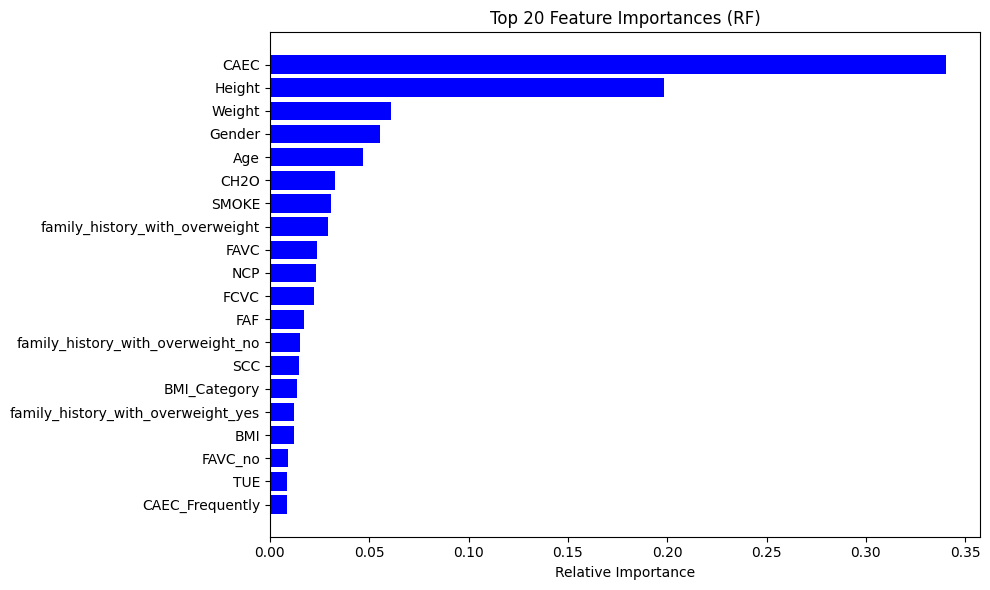

In [43]:
# Plot feature importance (get feature names after one-hot encoding)
try:
    # Get feature names after preprocessing
    num_features = feature_cols
    cat_features = preprocessor_obj.named_transformers_['cat'].get_feature_names_out(categorical_cols)
    all_feature_names = np.concatenate([num_features, cat_features])
    
    plot_feature_importance(grid_cv_model, all_feature_names)
except Exception as e:
    print(f"Could not plot feature importance: {str(e)}")

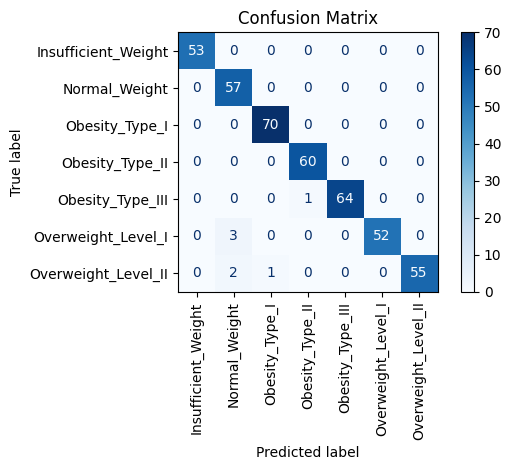

In [44]:
# Plot Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show();

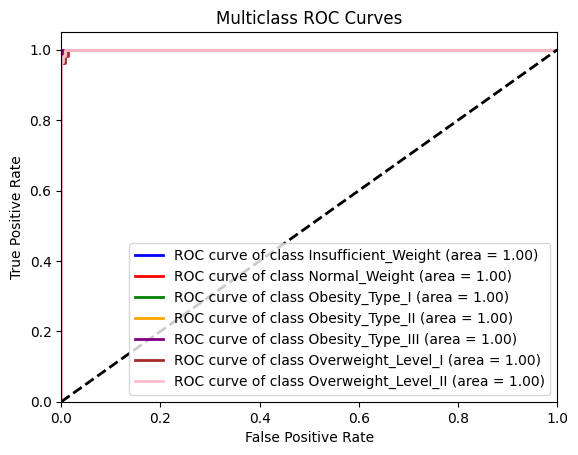

In [45]:
# Plot ROC Curve (for binary classification)
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

if len(class_names) == 2 and y_proba is not None:
    fpr, tpr, _ = roc_curve(y_test, y_proba[:, 1])
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
elif y_proba is not None:
    # For multiclass classification - plot ROC for each class
    y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
    n_classes = y_test_bin.shape[1]
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    # Plot all ROC curves
    plt.figure()
    colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink']  # Add more if needed
    
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'ROC curve of class {class_names[i]} (area = {roc_auc[i]:.2f})')
    
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Multiclass ROC Curves')
    plt.legend(loc="lower right")
    plt.show();

#### XGBoost

In [46]:
from helper_functions import (preprocessor, labelEncode, split, xgboost_classifier, hyperparameter_tuning_xgb, eval_metrics, plot_feature_importance, plot_shap_summary)

X = df_processed.drop(["NObeyesdad"], axis=1)
y = df_processed['NObeyesdad']

# Preprocess and split data
try:
    np.random.seed(42)
    (X_train, X_test, y_train, y_test), preprocessor_obj, label_encoder = split(
        X, y, numerical_cols, categorical_cols
    )
    print("Data split successfully")
    print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")
except Exception as e:
    print(f"Error during data splitting: {str(e)}")
    raise

Data split successfully
Train shape: (1669, 32), Test shape: (418, 32)


In [47]:
model_xgb = xgboost_classifier(X_train, y_train)
print("Model successfully trained")

Model successfully trained


#### Evaluation

In [48]:
# Make predictions
y_pred = model_xgb.predict(X_test)
y_proba = model_xgb.predict_proba(X_test) if hasattr(model_xgb, "predict_proba") else None

# Get class names from label encoder
class_names = label_encoder.classes_

# Calculate and display metrics
metrics = eval_metrics(y_test, y_pred, y_proba, class_names)
print("\nClassification Report:")
print(pd.DataFrame(metrics['classification_report']).transpose())
print(f"\nAccuracy: {metrics['accuracy']:.4f}")
print(f"Weighted Precision: {metrics['precision']:.4f}")
print(f"Weighted Recall: {metrics['recall']:.4f}")
print(f"Weighted F1 Score: {metrics['f1']:.4f}")


Classification Report:
              precision    recall  f1-score     support
0              1.000000  0.981132  0.990476   53.000000
1              0.982759  1.000000  0.991304   57.000000
2              1.000000  0.985714  0.992806   70.000000
3              0.967742  1.000000  0.983607   60.000000
4              1.000000  0.984615  0.992248   65.000000
5              1.000000  0.945455  0.971963   55.000000
6              0.950820  1.000000  0.974790   58.000000
accuracy       0.985646  0.985646  0.985646    0.985646
macro avg      0.985903  0.985274  0.985313  418.000000
weighted avg   0.986194  0.985646  0.985656  418.000000

Accuracy: 0.9856
Weighted Precision: 0.9862
Weighted Recall: 0.9856
Weighted F1 Score: 0.9857


#### Hyperparameter Tunning XGBoost

In [49]:
# Replace the basic xgboost_classifier call with tuned version
print("Starting hyperparameter tuning...")
xgb_search = hyperparameter_tuning_xgb(X_train, y_train)

# Get the best model
model_xgb = xgb_search.best_estimator_
print("Best parameters found:", xgb_search.best_params_)

Starting hyperparameter tuning...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0}


In [50]:
from helper_functions import random_xgb
best_params = {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0}

rand_xgb = random_xgb(X_train, y_train, **best_params)

In [51]:
# Make predictions
y_pred = rand_xgb.predict(X_test)
y_proba = rand_xgb.predict_proba(X_test) if hasattr(model_rf, "predict_proba") else None

# Get class names from label encoder
class_names = label_encoder.classes_

# Calculate and display metrics
metrics = eval_metrics(y_test, y_pred, y_proba, class_names)
print("\nClassification Report:")
print(pd.DataFrame(metrics['classification_report']).transpose())
print(f"\nAccuracy: {metrics['accuracy']:.4f}")
print(f"Weighted Precision: {metrics['precision']:.4f}")
print(f"Weighted Recall: {metrics['recall']:.4f}")
print(f"Weighted F1 Score: {metrics['f1']:.4f}")


Classification Report:
              precision    recall  f1-score     support
0              1.000000  0.981132  0.990476   53.000000
1              0.982759  1.000000  0.991304   57.000000
2              1.000000  1.000000  1.000000   70.000000
3              0.983607  1.000000  0.991736   60.000000
4              1.000000  0.984615  0.992248   65.000000
5              1.000000  0.945455  0.971963   55.000000
6              0.950820  1.000000  0.974790   58.000000
accuracy       0.988038  0.988038  0.988038    0.988038
macro avg      0.988169  0.987315  0.987502  418.000000
weighted avg   0.988472  0.988038  0.988028  418.000000

Accuracy: 0.9880
Weighted Precision: 0.9885
Weighted Recall: 0.9880
Weighted F1 Score: 0.9880


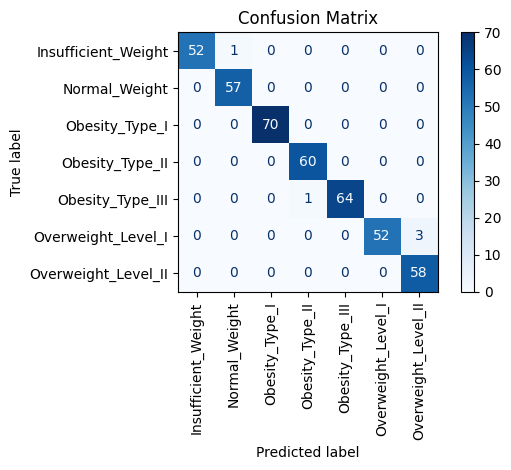

In [52]:
# Plot Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show();


Plotting feature importance...


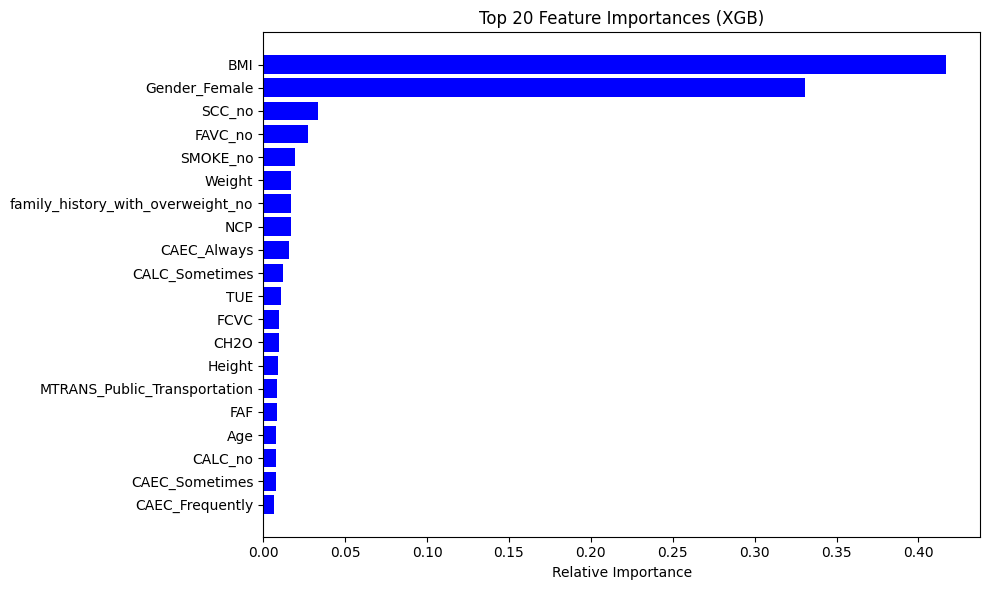

Running SHAP analysis on full test set...


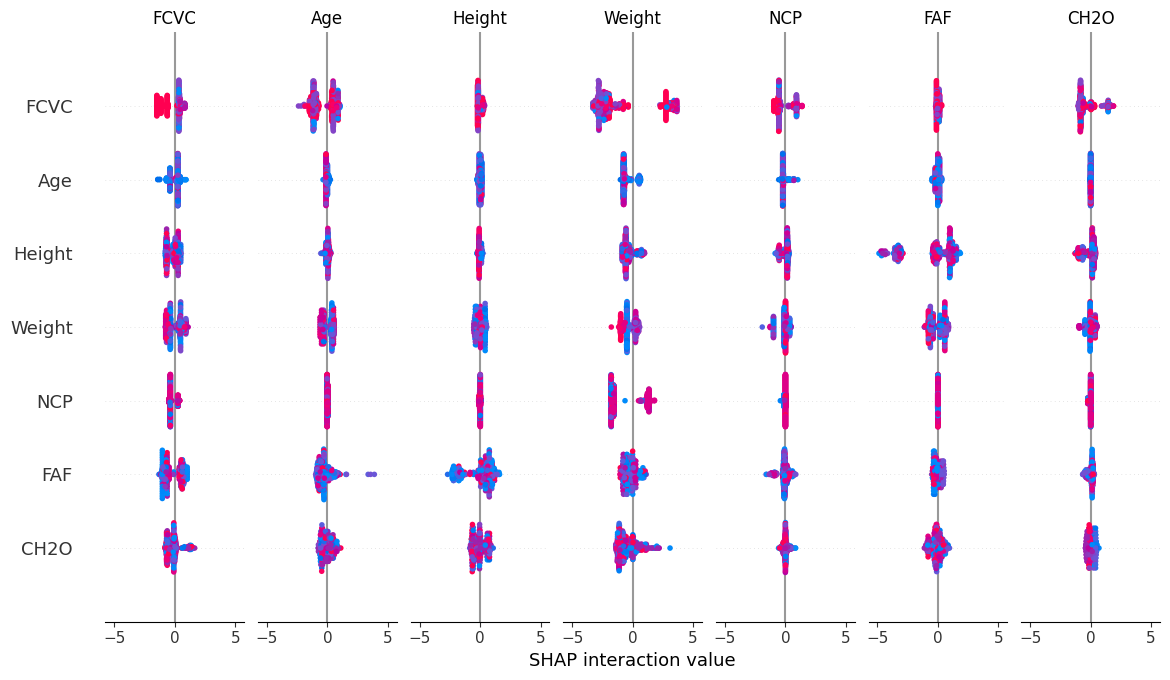

In [53]:
# Get feature names after preprocessing
feature_names = numerical_cols + list(
    preprocessor_obj.named_transformers_['cat']
    .get_feature_names_out(categorical_cols)
)

# Plot feature importance
print("\nPlotting feature importance...")
plot_feature_importance(rand_xgb, feature_names, model_type='xgb')

# Optional: SHAP analysis (for interpretability)
if len(X_test) > 1000:  # SHAP can be slow on large datasets
    print("Running SHAP analysis on sample of 500 instances...")
    sample_idx = np.random.choice(X_test.shape[0], 500, replace=False)
    plot_shap_summary(rand_xgb, X_test[sample_idx], feature_names)
else:
    print("Running SHAP analysis on full test set...")
    plot_shap_summary(rand_xgb, X_test, feature_names)

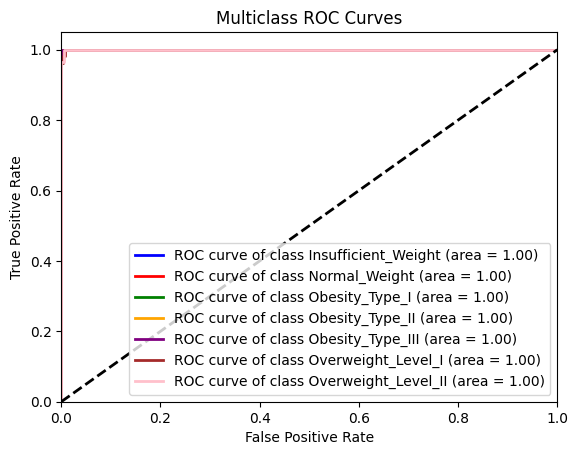

In [54]:
# Plot ROC Curve (for binary classification)
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

if len(class_names) == 2 and y_proba is not None:
    fpr, tpr, _ = roc_curve(y_test, y_proba[:, 1])
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
elif y_proba is not None:
    # For multiclass classification - plot ROC for each class
    y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
    n_classes = y_test_bin.shape[1]
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    # Plot all ROC curves
    plt.figure()
    colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink']  # Add more if needed
    
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'ROC curve of class {class_names[i]} (area = {roc_auc[i]:.2f})')
    
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Multiclass ROC Curves')
    plt.legend(loc="lower right")
    plt.show();

### SVC

In [55]:
from helper_functions import (preprocessor, labelEncode, split, svc_classifier, hyperparameter_tuning_svc, eval_metrics, plot_feature_importance, plot_shap_summary)

X = df_processed.drop(["NObeyesdad"], axis=1)
y = df_processed['NObeyesdad']

# Preprocess and split data
try:
    np.random.seed(42)
    (X_train, X_test, y_train, y_test), preprocessor_obj, label_encoder = split(
        X, y, numerical_cols, categorical_cols
    )
    print("Data split successfully")
    print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")
except Exception as e:
    print(f"Error during data splitting: {str(e)}")
    raise

Data split successfully
Train shape: (1669, 32), Test shape: (418, 32)


In [56]:
model_svc = svc_classifier(X_train, y_train)
print("Model successfully trained")

Model successfully trained


#### Evaluation

In [57]:
# Make predictions
y_pred = model_svc.predict(X_test)
y_proba = model_svc.predict_proba(X_test) if hasattr(model_svc, "predict_proba") else None

# Get class names from label encoder
class_names = label_encoder.classes_

# Calculate and display metrics
metrics = eval_metrics(y_test, y_pred, y_proba, class_names)
print("\nClassification Report:")
print(pd.DataFrame(metrics['classification_report']).transpose())
print(f"\nAccuracy: {metrics['accuracy']:.4f}")
print(f"Weighted Precision: {metrics['precision']:.4f}")
print(f"Weighted Recall: {metrics['recall']:.4f}")
print(f"Weighted F1 Score: {metrics['f1']:.4f}")


Classification Report:
              precision    recall  f1-score     support
0              0.962963  0.981132  0.971963   53.000000
1              0.879310  0.894737  0.886957   57.000000
2              0.985294  0.957143  0.971014   70.000000
3              0.967742  1.000000  0.983607   60.000000
4              1.000000  0.984615  0.992248   65.000000
5              0.888889  0.872727  0.880734   55.000000
6              0.931034  0.931034  0.931034   58.000000
accuracy       0.947368  0.947368  0.947368    0.947368
macro avg      0.945033  0.945913  0.945365  418.000000
weighted avg   0.947564  0.947368  0.947355  418.000000

Accuracy: 0.9474
Weighted Precision: 0.9476
Weighted Recall: 0.9474
Weighted F1 Score: 0.9474


#### Hyperparameter Tunning with SVC

In [58]:
# Replace the basic xgboost_classifier call with tuned version
print("Starting hyperparameter tuning...")
svc_search = hyperparameter_tuning_svc(X_train, y_train)

# Get the best model
model_svc = svc_search.best_estimator_
print("Best parameters found:", svc_search.best_params_)

Starting hyperparameter tuning...
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters found: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}


In [59]:
from helper_functions import random_svc

best_params = {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
grid_svc = random_svc(X_train, y_train, **best_params)

In [60]:
# Make predictions
y_pred = grid_svc.predict(X_test)
y_proba = grid_svc.predict_proba(X_test) if hasattr(grid_svc, "predict_proba") else None

# Get class names from label encoder
class_names = label_encoder.classes_

# Calculate and display metrics
metrics = eval_metrics(y_test, y_pred, y_proba, class_names)
print("\nClassification Report:")
print(pd.DataFrame(metrics['classification_report']).transpose())
print(f"\nAccuracy: {metrics['accuracy']:.4f}")
print(f"Weighted Precision: {metrics['precision']:.4f}")
print(f"Weighted Recall: {metrics['recall']:.4f}")
print(f"Weighted F1 Score: {metrics['f1']:.4f}")


Classification Report:
              precision    recall  f1-score     support
0              0.981481  1.000000  0.990654   53.000000
1              0.948276  0.964912  0.956522   57.000000
2              0.985915  1.000000  0.992908   70.000000
3              0.983607  1.000000  0.991736   60.000000
4              1.000000  0.984615  0.992248   65.000000
5              0.981132  0.945455  0.962963   55.000000
6              0.982456  0.965517  0.973913   58.000000
accuracy       0.980861  0.980861  0.980861    0.980861
macro avg      0.980410  0.980071  0.980135  418.000000
weighted avg   0.980970  0.980861  0.980814  418.000000

Accuracy: 0.9809
Weighted Precision: 0.9810
Weighted Recall: 0.9809
Weighted F1 Score: 0.9808


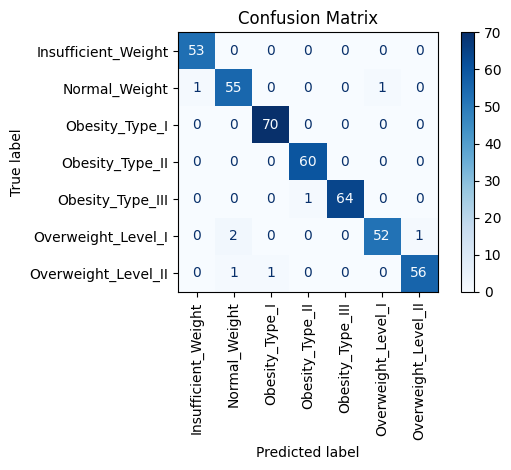

In [61]:
# Plot Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show();

### MODEL COMPARISON

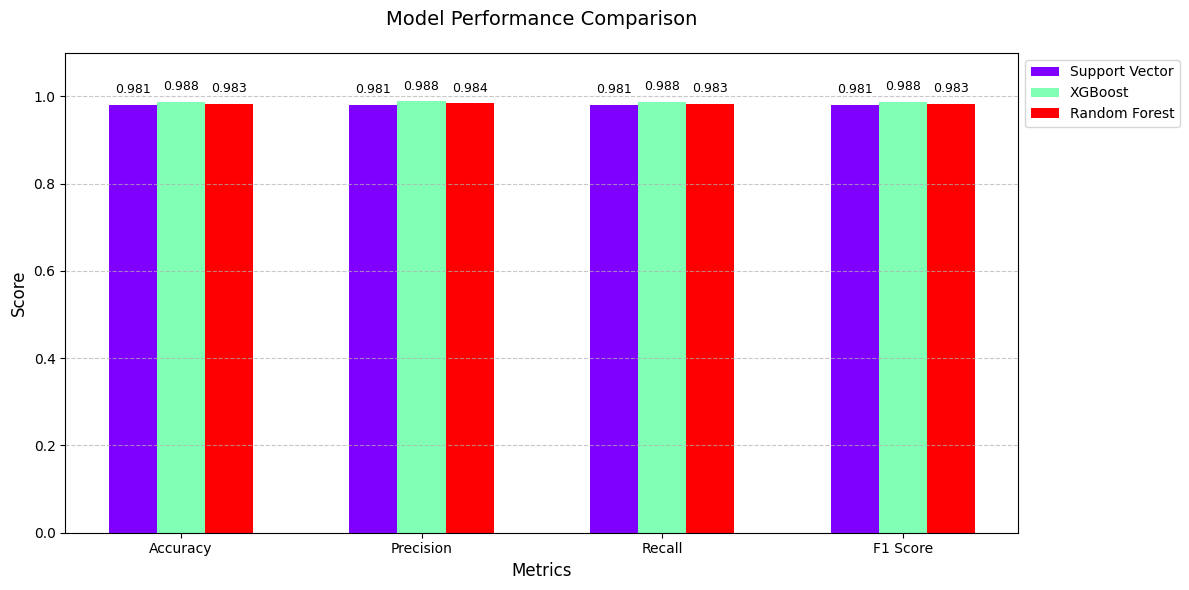

In [62]:
from helper_functions import plot_model_comparison

# Create the models dictionary
models_to_compare = {
    'Support Vector': grid_svc,
    'XGBoost': rand_xgb,
    'Random Forest': grid_cv_model
}

# Generate and show the plot
fig = plot_model_comparison(models_to_compare, X_test, y_test)
plt.show()

# Optional: Save the figure
fig.savefig('model_comparison.png', dpi=300, bbox_inches='tight')

### DEPLOYMENT

#### Using Fast API as the deployment method
1. Model Preparation
The trained Random Forest model was saved using joblib along with the preprocessing pipeline that includes StandardScaler for numerical features and Label Encoder for categorical variables. This ensures identical data transformation between training and inference.

2. API Design Decisions
We chose FastAPI over Flask due to automatic data validation, built-in documentation, and better performance for our expected requets. The API accepts customer data as JSON and returns both binary predictions and probability scores.

3. Data Validation Approach
Input validation uses Pydantic models to ensure all required features are present and within expected ranges. This prevents the model from receiving out-of-distribution data that could cause errors.

4. Model Serving Architecture
The FastAPI application loads the model and preprocessing pipeline at startup to avoid repeated file I/O. Each prediction request processes the input through the same preprocessing steps used during training, then passes the transformed data to the Random Forest model.

5. Deployment Environment
 We'll use Docker to ensure a consistent Python environment and dependencies across development and production systems.


This deployment approach balances simplicity with robustness, providing reliable access to model predictions while maintaining data science best practices for model serving.